In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 203s 1us/step


(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

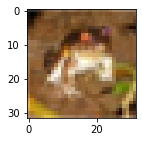

In [12]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

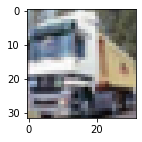

In [13]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [14]:
y_train.shape

(50000, 1)

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
y_train= y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [24]:
classes=['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
classes[2]

'bird'

In [29]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

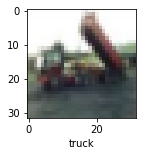

In [31]:
plot_sample(X_train, y_train, 2)

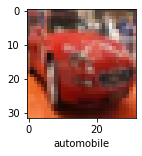

In [32]:
plot_sample(X_train, y_train, 5)

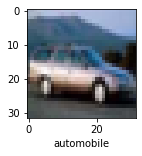

In [33]:
plot_sample(X_train, y_train, 4)

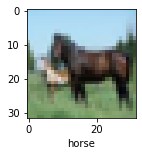

In [34]:
plot_sample(X_train, y_train, 12)

In [37]:
X_train=X_train/255
X_test=X_test/255
X_train

array([[[[0.00090734, 0.00095348, 0.00096886],
         [0.00066128, 0.00070742, 0.00069204],
         [0.00076894, 0.00073818, 0.00066128],
         ...,
         [0.00242983, 0.00202999, 0.0016609 ],
         [0.00233756, 0.00192234, 0.00156863],
         [0.00227605, 0.00190696, 0.00158401]],

        [[0.00024606, 0.00030757, 0.00030757],
         [0.        , 0.        , 0.        ],
         [0.00027682, 0.00012303, 0.        ],
         ...,
         [0.00189158, 0.00135333, 0.00084583],
         [0.00183007, 0.00127643, 0.00076894],
         [0.0018762 , 0.00133795, 0.00087659]],

        [[0.00038447, 0.00036909, 0.00032295],
         [0.00024606, 0.00010765, 0.        ],
         [0.00075356, 0.00041522, 0.00012303],
         ...,
         [0.00181469, 0.00129181, 0.00076894],
         [0.00184544, 0.00129181, 0.00076894],
         [0.00167628, 0.00112265, 0.00064591]],

        ...,

        [[0.00319877, 0.00261438, 0.00147636],
         [0.00309112, 0.00235294, 0.00052288]

In [44]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 116s 74ms/step - loss: 2.3019 - accuracy: 0.1238
Epoch 2/5
1563/1563 [==============================] - 109s 70ms/step - loss: 2.3015 - accuracy: 0.1506
Epoch 3/5
1563/1563 [==============================] - 108s 69ms/step - loss: 2.3013 - accuracy: 0.1476
Epoch 4/5
1563/1563 [==============================] - 117s 75ms/step - loss: 2.3011 - accuracy: 0.1344
Epoch 5/5
1563/1563 [==============================] - 104s 66ms/step - loss: 2.3009 - accuracy: 0.1527


In [45]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 2.3007 - accuracy: 0.1537


[2.3007285594940186, 0.15369999408721924]

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report:\n', classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.87      0.25      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.33      0.00      0.00      1000
           4       0.40      0.01      0.02      1000
           5       0.16      0.42      0.23      1000
           6       0.00      0.00      0.00      1000
           7       0.16      0.24      0.19      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.15     10000
   macro avg       0.12      0.15      0.07     10000
weighted avg       0.12      0.15      0.07     10000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 2.0639 - accuracy: 0.2422
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8138 - accuracy: 0.3490
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6894 - accuracy: 0.3898
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.6209 - accuracy: 0.4151
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5731 - accuracy: 0.4339
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5380 - accuracy: 0.4488
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5071 - accuracy: 0.4585
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4692 - accuracy: 0.4739
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4392 - accuracy: 0.48450s - loss: 1.4388 - accu - ETA: 0s - loss: 1.4391 - accuracy: 0.


In [53]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4355 - accuracy: 0.4857


[1.4355486631393433, 0.48570001125335693]

In [54]:
y_test.shape

(10000, 1)

In [55]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [58]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

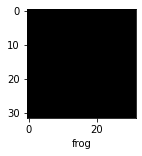

In [61]:
plot_sample(X_test, y_test, 4)

In [64]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[3.14806332e-03, 6.12902222e-03, 6.77718446e-02, 4.78925377e-01,
        3.92541848e-02, 2.58859426e-01, 1.24940708e-01, 9.15090367e-03,
        8.13172478e-03, 3.68879386e-03],
       [1.76762924e-01, 2.83114016e-01, 1.69828138e-03, 1.28077099e-03,
        2.41927663e-03, 4.03770886e-04, 2.02607698e-04, 9.67743341e-04,
        3.56667787e-01, 1.76482841e-01],
       [7.88015723e-02, 1.61857113e-01, 5.61125763e-03, 4.68267966e-03,
        5.33223478e-03, 1.10699260e-03, 1.50540296e-03, 1.20735599e-03,
        6.15934491e-01, 1.23960905e-01],
       [2.14763060e-01, 9.82125178e-02, 1.30921323e-02, 7.15627568e-03,
        1.64500885e-02, 1.61271216e-03, 1.19002154e-02, 4.27767774e-03,
        6.06036484e-01, 2.64987834e-02],
       [4.11486346e-03, 6.16441830e-04, 1.28421068e-01, 1.42833054e-01,
        2.89495975e-01, 9.52922180e-02, 2.90092915e-01, 4.62212898e-02,
        2.40618200e-03, 5.05979988e-04]], dtype=float32)

In [66]:
y_classes= [np.argmax(element) for element in y_pred]

In [67]:
y_classes[:10]

[3, 8, 8, 8, 6, 6, 3, 6, 5, 1]

In [68]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

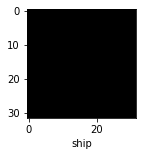

In [69]:
plot_sample(X_test, y_test, 2)

In [70]:
classes[y_classes[2]]

'ship'

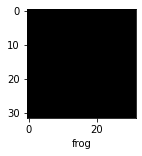

In [71]:
plot_sample(X_test, y_test, 5)

In [72]:
classes[y_classes[5]]

'frog'

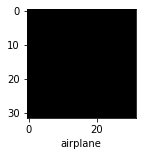

In [75]:
plot_sample(X_test, y_test, 10)

In [77]:
classes[y_classes[10]]

'ship'

In [79]:
print('Classification Report:\n', classification_report(y_test, y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.52      0.56      1000
           1       0.70      0.47      0.56      1000
           2       0.37      0.39      0.38      1000
           3       0.33      0.27      0.30      1000
           4       0.44      0.36      0.39      1000
           5       0.43      0.42      0.43      1000
           6       0.44      0.68      0.53      1000
           7       0.51      0.56      0.54      1000
           8       0.53      0.70      0.61      1000
           9       0.56      0.48      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000

